In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [2]:
train = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\AI_class_Data\hand_number\train(7).csv')
test = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\AI_class_Data\hand_number\test(7).csv')

In [3]:
train

,index,label,px1,px2,px3,px4,px5,px6,px7,px8,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
image = train.drop(columns=['index','label'])
y = train['label']

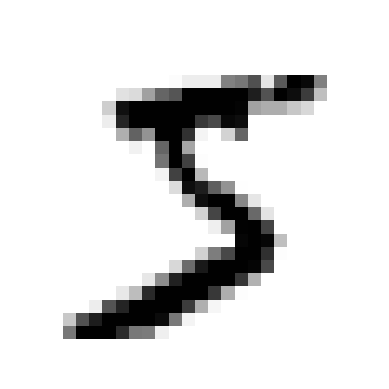

In [5]:
some_digit = image.loc[0]
some_digit_image = some_digit.values.reshape(28, 28) # 모양 늘리기
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

In [6]:
y = y.astype(np.uint8)

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

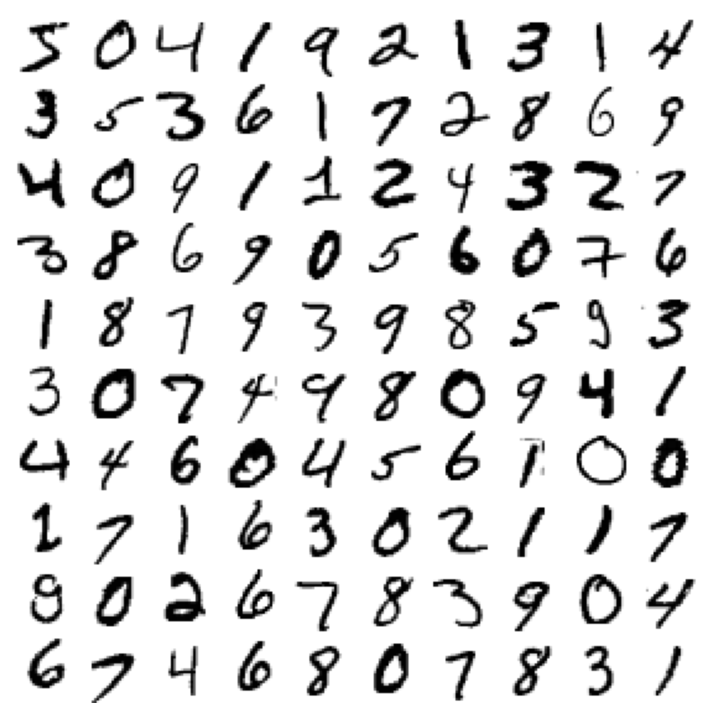

In [9]:
plt.figure(figsize=(9,9))
example_images = image[:100].values
plot_digits(example_images, images_per_row=10)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image, y, test_size= 0.2,shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [11]:
y_train.value_counts()

1    5394
7    5012
3    4905
2    4766
9    4759
0    4738
6    4734
8    4681
4    4674
5    4337
Name: label, dtype: int64

# 스케일링 진행

모델을 학습하는데 필수적인 스케일링을 진행해주었습니다.

In [12]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# 모델 성능 평가 함수

In [13]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')
    print(f"recall_score : {recall_score(pred,answer,average='macro')}")
    print(f"precision_score : {precision_score(pred,answer,average='macro')}")
    print(f"f1_score : {f1_score(pred,answer,average='macro')}")
    print(f'coufusion_matrix : ')
    print(confusion_matrix(pred,answer))

# 트리 모델 기반의 분류기

## DecisionTree (의사결정트리)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_depth_10 = DecisionTreeClassifier(max_depth=10, random_state=42) # 코드 입력  # max_depth 를 2로 설정
tree_clf_depth_10.fit(X_train, y_train)  # 모델 학습

DecisionTreeClassifier(max_depth=10, random_state=42)

In [17]:
model_eval(tree_clf_depth_10.predict(X_test),y_test)

accuracy_score : 0.85375
recall_score : 0.8535617926085118
precision_score : 0.8519699651380528
f1_score : 0.8523570406328543
coufusion_matrix : 
[[1082    0   16    4   10    8   16    6    4    7]
 [   4 1267   14    8    5   15    8   18   24    7]
 [   9   19  983   43    6   14   19   28   30   11]
 [  12   18   43  989    8   61    9   24   46   23]
 [   4    8   16   14  976   24   22    8   24   26]
 [  16   10   19   51   15  849   29    6   33   16]
 [  25    1   23   12   12   29 1051    4   25    3]
 [   7    8   27   20   21    7    2 1084    7   31]
 [  16   11   41   53   31   26   17   27  927   29]
 [  10    6   10   32   84   51   11   48   50 1037]]


## RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42)# 위와 같은 조건으로 random forest 선언
rnd_clf.fit(X_train,y_train)# random forest classifier 학습
# 심플하게 구현할 수 있는 장점이 있어서 랜덤포레스트를 자주 사용한다.



RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

In [28]:
model_eval(rnd_clf.predict(X_test),y_test)

accuracy_score : 0.9465
recall_score : 0.9466540591158374
precision_score : 0.9461129912597664
f1_score : 0.9462779167781642
coufusion_matrix : 
[[1164    0    5    2    3    4    6    4    3    4]
 [   1 1317    6    6    2   11    2   10   19    6]
 [   1   15 1132   24    3    1    0   20    8    1]
 [   0    7    5 1124    0   20    1    3   13   19]
 [   2    1   10    1 1097    5    4    8    6   17]
 [   0    1    0   19    1 1013   16    0    8    3]
 [   2    1    6    3    7    7 1151    0    5    1]
 [   0    2    9   10    3    2    0 1172    1   23]
 [  15    2   15   25    4   10    4    6 1081    9]
 [   0    2    4   12   48   11    0   30   26 1107]]


# RandomForest 모델 튜닝

In [33]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV 를 통해 파라미터 튜닝을 진행
tuned_parameters = {
    'n_estimators' : [300],
    'max_depth': range(2,10,1),
    'min_samples_leaf': range(2,10,1),
}

model_grid = GridSearchCV(RandomForestClassifier(random_state=42,n_jobs=-1), tuned_parameters, cv=3, scoring="accuracy", verbose=2, refit=True)
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END ..max_depth=2, min_samples_leaf=2, n_estimators=300; total time=   7.1s
[CV] END ..max_depth=2, min_samples_leaf=2, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=2, min_samples_leaf=2, n_estimators=300; total time=   2.6s
[CV] END ..max_depth=2, min_samples_leaf=3, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=2, min_samples_leaf=3, n_estimators=300; total time=   2.5s
[CV] END ..max_depth=2, min_samples_leaf=3, n_estimators=300; total time=   2.5s
[CV] END ..max_depth=2, min_samples_leaf=4, n_estimators=300; total time=   2.6s
[CV] END ..max_depth=2, min_samples_leaf=4, n_estimators=300; total time=   2.6s
[CV] END ..max_depth=2, min_samples_leaf=4, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=300; total time=   2.5s
[CV] END ..max_depth=2, min_samples_leaf=5, n_estimators=300; total time=   2.3s
[CV] END ..max_depth=2, min_samples_leaf=5, n_e

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'n_estimators': [300]},
             scoring='accuracy', verbose=2)

In [34]:
model_grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 300}

In [35]:
model_eval(model_grid.predict(X_test),y_test)

accuracy_score : 0.93825
recall_score : 0.938542884531272
precision_score : 0.9377151142522147
f1_score : 0.9379871427535302
coufusion_matrix : 
[[1159    0    6    3    3    7    7    4    3    5]
 [   1 1316    8    7    2   12    3   14   22    6]
 [   1   12 1120   28    3    1    1   21   11    2]
 [   0    8    6 1113    1   26    0    4   16   20]
 [   2    1   12    1 1085    4    6    8    7   22]
 [   2    2    0   18    1  999   14    0    8    3]
 [   2    2    9    3   10    6 1146    0    8    1]
 [   0    3   12   11    3    2    0 1162    3   27]
 [  18    2   15   25    4   12    7    6 1066   11]
 [   0    2    4   17   56   15    0   34   26 1093]]


# CNN

In [45]:
X_train = X_train.values.reshape((-1,28 ,28))
X_test = X_test.values.reshape((-1,28 ,28))

In [46]:
num_classes = 10

cnn_y_train = keras.utils.to_categorical(y_train, num_classes)
cnn_y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
input_shape = (28,28,1)

In [48]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [49]:
import time

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

hist = model.fit(X_train, y_train, epochs=5, verbose = 1, validation_data=(X_test, y_test))

print(f'Fit Time :{time.time() - start_time}')

Epoch 1/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.1281 - accuracy: 0.9599 - val_loss: 0.0539 - val_accuracy: 0.9838
Epoch 2/5
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0508 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0429 - val_accuracy: 0.9877
Epoch 4/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0572 - val_accuracy: 0.9843
Epoch 5/5
1500/1500 [==============================] - 64s 42ms/step - loss: 0.0210 - accuracy: 0.9937 - val_loss: 0.0518 - val_accuracy: 0.9853
Fit Time :346.01298809051514


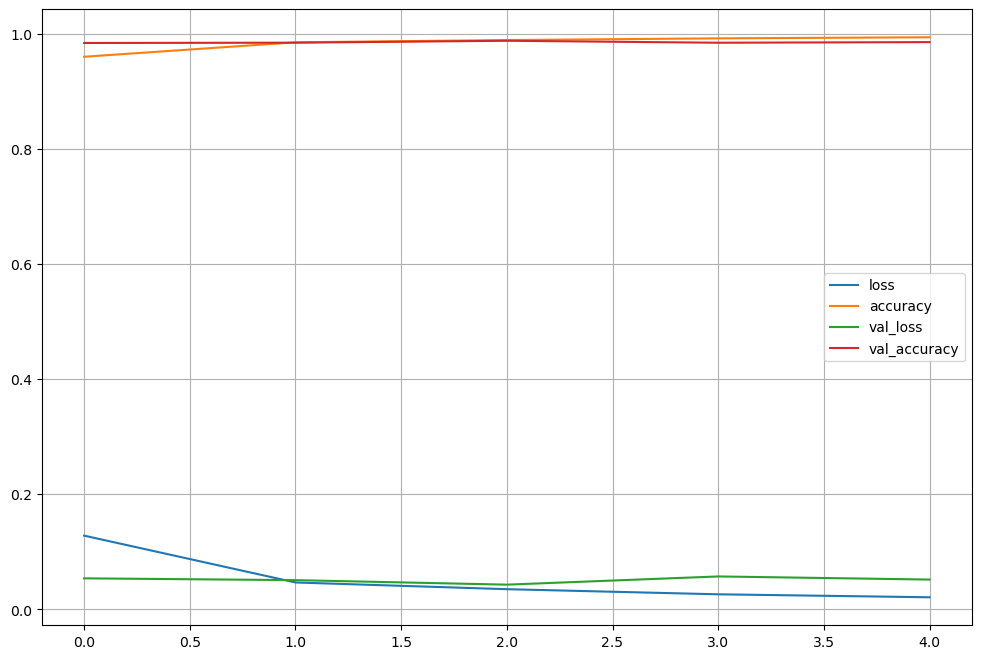

In [51]:
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [50]:
score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')


375/375 [==============================] - 4s 11ms/step - loss: 0.0518 - accuracy: 0.9853
Test Loss : 0.05175342410802841
Test Accuracy  : 0.9853333234786987


In [52]:
predicted_result = model.predict(X_test)

375/375 [==============================] - 5s 12ms/step


In [53]:
model_eval(predicted_result,y_test)
predicted_labels = np.argmax(predicted_result,  axis=1)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [55]:
predicted_labels = np.argmax(predicted_result,  axis=1)

In [58]:
model_eval(predicted_labels,y_test)

accuracy_score : 0.9853333333333333
recall_score : 0.9854760872624926
precision_score : 0.9851834084423698
f1_score : 0.985244908680875
coufusion_matrix : 
[[1182    0    8    1    1    0    2    0    3    1]
 [   1 1343    3    0    1    0    1    4    1    0]
 [   0    1 1152    0    0    0    0    2    1    0]
 [   0    1   11 1213    0    4    0    0    2    0]
 [   0    1    1    0 1134    0    1    5    1    1]
 [   0    0    0    4    0 1067    0    0    2    2]
 [   2    0    0    0    1    6 1177    0    3    0]
 [   0    1    5    3    1    0    0 1226    0    2]
 [   0    0   11    4    0    3    3    2 1149    3]
 [   0    1    1    1   30    4    0   14    8 1181]]


In [61]:
error_cm = pd.DataFrame(confusion_matrix(predicted_labels,y_test))

In [60]:
import seaborn as sns

<AxesSubplot:>

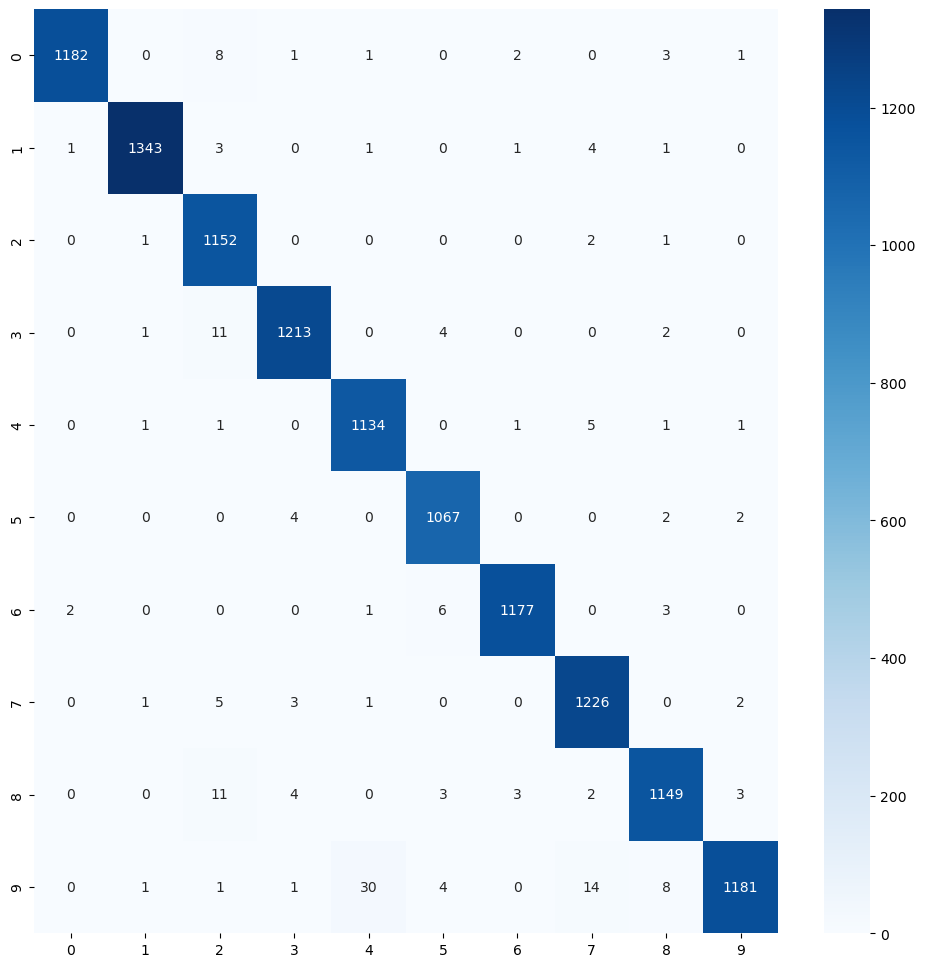

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(error_cm, cmap='Blues',annot = True,fmt='g')

In [68]:
image_test = test.drop(columns=['index'])
image_test

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
image_test = image_test.astype('float32') / 255.

In [71]:
image_test = image_test.values.reshape((-1,28 ,28))

In [72]:
test_predicted = model.predict(image_test)
test_predicted

313/313 [==============================] - 4s 13ms/step


array([[1.01965887e-10, 9.24803700e-09, 6.41379181e-12, ...,
        9.99999166e-01, 3.08686318e-13, 6.68822224e-07],
       [3.94610700e-09, 7.80945619e-09, 1.00000000e+00, ...,
        7.38331878e-12, 3.87619797e-11, 9.29671878e-12],
       [3.98277988e-09, 9.99999881e-01, 2.89717084e-10, ...,
        2.95635001e-08, 1.17772075e-07, 2.27768542e-08],
       ...,
       [3.55683568e-14, 4.50713511e-09, 4.69165071e-13, ...,
        1.08688469e-09, 1.69364878e-08, 4.32795161e-07],
       [1.32150497e-12, 2.41138183e-16, 6.67941640e-21, ...,
        1.91893104e-16, 2.78928792e-06, 2.25089548e-11],
       [9.68537694e-10, 3.01252458e-13, 4.96459080e-12, ...,
        1.22007115e-16, 2.36563729e-08, 1.20823421e-10]], dtype=float32)

In [76]:
predicted_labels = np.argmax(test_predicted,  axis=1)

In [73]:
submission = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\AI_class_Data\hand_number\submission(7).csv')
submission

,index,label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5


In [77]:
submission['label'] = predicted_labels

In [78]:
submission

,index,label
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5


In [79]:
submission.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\data\AI_class_Data\hand_number\submission_17011733_윤지환.csv',index = False)